In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import ndimage
import random
from scipy.optimize import leastsq
from scipy import ndimage
from scipy.optimize import least_squares
from func import *
from scipy import stats
from matplotlib.colors import LogNorm
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
kernel = Gaussian2DKernel(x_stddev=0.5)
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.weight'] = 'light'
from matplotlib import cm
import cmocean

In [21]:
(x_BH,y_BH)=(49.6491,49.8141)
(x_jet,y_jet)=(63.90426063, 56.69233101)
(x_jet_new,y_jet_new) = np.multiply(0.2,(x_jet-x_BH,y_jet-y_BH))

xmin = - x_BH*0.2 - 0.5*0.2
xmax = 0.2*(100 - x_BH) + 0.5*0.2
ymin = - y_BH*0.2 - 0.5*0.2
ymax = 0.2*(100 - y_BH) + 0.5*0.2

print (np.sqrt(x_jet_new**2+y_jet_new**2))

3.165562612958573


In [22]:
hdu = fits.open('/Volumes/Seagate/HE0040-1105 Extended/table_HE0040-1105_extended_single_gauss.fits')
data = hdu[1].data
amp_OIII = data['amp_OIII']
amp_OIII_err = data['amp_OIII_err']
vel_OIII = data['vel_OIII']
vel_OIII_err = data['vel_OIII_err']
vel_sigma_OIII = data['vel_sigma_OIII']
vel_sigma_OIII_err = data['vel_sigma_OIII_err']
x_cor = np.array([int(x) for x in data['x_cor']])
y_cor = np.array([int(x) for x in data['y_cor']])
vel_syst = (vel_OIII/vel_OIII)*12568
hdu.close()

In [23]:
import seaborn as sns

In [24]:
gas_select = (amp_OIII/ amp_OIII_err > 7)# &  (vel_sigma_OIII/vel_sigma_OIII_err > 1)  
dim = [0,101,101]

In [25]:
OIII_flux_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_flux_map[x_cor[gas_select],y_cor[gas_select]] = amp_OIII[gas_select]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


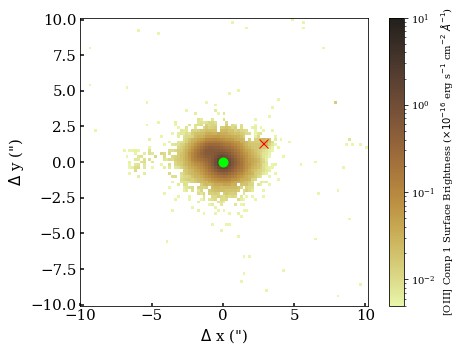

In [26]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

cmap = cmocean.cm.turbid
cmap.set_bad('w',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, interpolation='None',vmin=0.005,vmax=10,extent=[xmin,xmax,ymin,ymax], norm=LogNorm())
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='Lime',ms=9)
plt.plot(x_jet_new,y_jet_new,'x',color='r',ms=9)

cbar.set_label(r"[OIII] Comp 1 Surface Brightness ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)",fontsize=10)

In [27]:
OIII_vel_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_map[x_cor[gas_select],y_cor[gas_select]] = vel_OIII[gas_select] - vel_syst[gas_select]

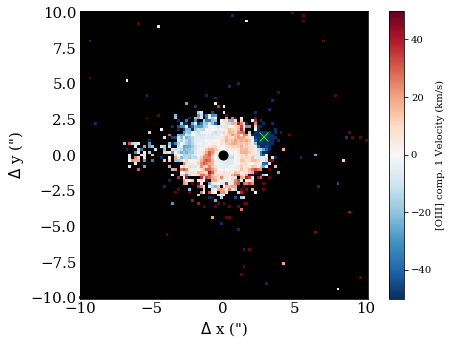

In [28]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

#OIII_vel_map[OIII_vel_map>50]=np.nan
#scipy_conv = scipy_convolve(OIII_vel_map, kernel, mode='same', method='direct')

#OIII_vel_map[OIII_vel_map<-50]=np.nan

cmap = cm.RdBu_r
cmap.set_bad('k',1) # Make the NANs white
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='k',ms=9)
plt.plot(x_jet_new,y_jet_new,'x',color='Lime',ms=9)


frame = plt.imshow(OIII_vel_map, origin='lower', cmap=cmap, vmin=-50,vmax=50,extent=[xmin,xmax,ymin,ymax], interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"[OIII] comp. 1 Velocity (km/s)")

In [38]:
OIII_vel_sigma_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_sigma_map[x_cor[gas_select],y_cor[gas_select]] = vel_sigma_OIII[gas_select]# - vel_syst[gas_select]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


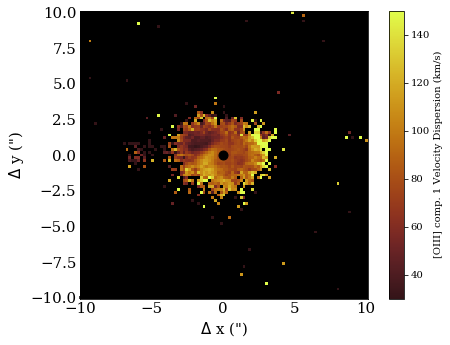

In [53]:
OIII_vel_sigma_map = np.full((dim[1],dim[2]) ,np.nan)
OIII_vel_sigma_map[x_cor[gas_select],y_cor[gas_select]] = vel_sigma_OIII[gas_select] #- vel_syst[gas_select]
fig = plt.figure()

ax = plt.axes([0,0,1,1])

OIII_vel_sigma_map[OIII_vel_sigma_map>200]=np.nan
cmap = cmocean.cm.solar

cmap.set_bad('k',1) # Make the NANs black

frame = plt.imshow(OIII_vel_sigma_map, origin='lower', cmap=cmap, vmin=30,vmax=150,extent=[xmin,xmax,ymin,ymax],interpolation='None')
cbar = plt.colorbar()
plt.tick_params(axis='both',which='both',direction='in',width=1.5,labelsize=15)
plt.xlabel(r'$\Delta$ x (")',fontsize=15)
plt.ylabel(r'$\Delta$ y (")',fontsize=15)
plt.plot(0,0,'o',color='k',ms=9)

cbar.set_label(r"[OIII] comp. 1 Velocity Dispersion (km/s)")

In [66]:
amp_OIII

array([ 0.00117623, -0.00168651,  0.00118915, ...,  0.00017225,
       -0.00133725,  0.00087516], dtype=float32)

In [67]:
amp_OIII_err

array([0.00066801, 0.00130841, 0.00112845, ..., 0.00143744, 0.00045245,
       0.00112881], dtype=float32)